In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv("C:/Users/Cold min/OneDrive/바탕 화면/Salary_Data.csv")
df = pd.DataFrame(data=features)


In [77]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [79]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\Cold min\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

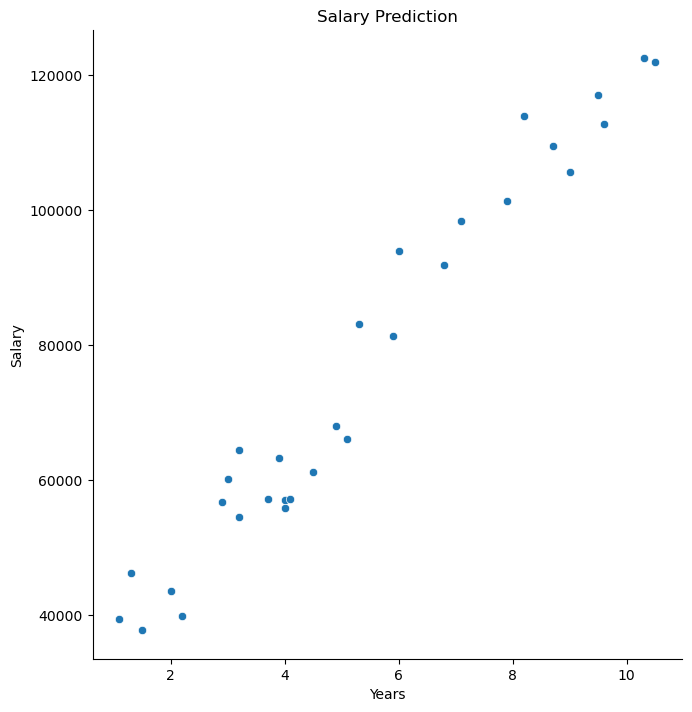

In [80]:
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [81]:
X = data['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [82]:
y=features['Salary']
y.value_counts()

39343.0     1
46205.0     1
122391.0    1
112635.0    1
116969.0    1
105582.0    1
109431.0    1
113812.0    1
101302.0    1
98273.0     1
91738.0     1
93940.0     1
81363.0     1
83088.0     1
66029.0     1
67938.0     1
61111.0     1
57081.0     1
56957.0     1
55794.0     1
63218.0     1
57189.0     1
64445.0     1
54445.0     1
60150.0     1
56642.0     1
39891.0     1
43525.0     1
37731.0     1
121872.0    1
Name: Salary, dtype: int64

In [83]:
# Import Segregating data from scikit learn
from sklearn.model_selection import train_test_split
# Split the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)
# Create new axis for x column
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

C:\Users\Cold min\AppData\Local\Temp\ipykernel_27848\4012471037.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]
C:\Users\Cold min\AppData\Local\Temp\ipykernel_27848\4012471037.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


In [50]:
features.isnull().sum()

Salary    0
dtype: int64

In [84]:
from sklearn.linear_model import LinearRegression
# Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred = lr.predict(X_test)

In [96]:
print(lr.coef_, lr.intercept_)

[9731.20383825] 25202.887786154883


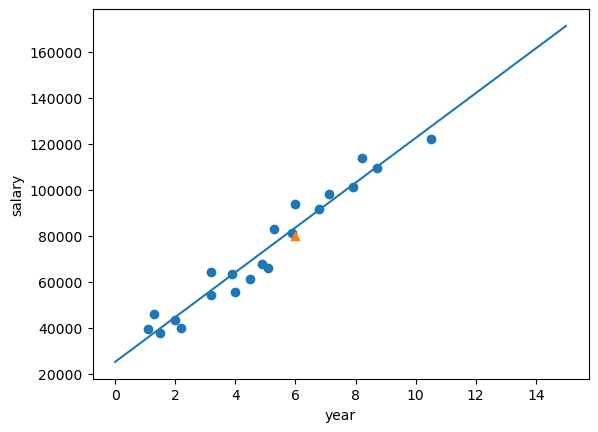

In [98]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(X_train, y_train)

plt.plot([0,15], [0*lr.coef_+lr.intercept_, 15*lr.coef_+lr.intercept_])
# 6년 80000 샐러리
plt.scatter(6, 80000, marker='^')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()